# Image Descriptors with OpenCV

OpenCV feature detection and matching
* Harris - detecting corners (https://docs.opencv.org/3.4/d4/d7d/tutorial_harris_detector.html)
* SIFT (Scale-Invariant Feature Transform) - detecting blobs
* SURF - detecting blobs
* FAST - detecting corners
* BRIEF - detecting blobs
* ORB (Oriented FAST and Rotated BRIEF) - detecting combination of corners and blobs

In [1]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

## Harris Corners

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/4/4c/King_of_the_Hill_chess.png

--2023-02-06 13:38:45--  https://upload.wikimedia.org/wikipedia/commons/4/4c/King_of_the_Hill_chess.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56089 (55K) [image/png]
Saving to: ‘King_of_the_Hill_chess.png’

King_of_the_Hill_ch 100%[===================>]  54.77K   257KB/s    in 0.2s    

2023-02-06 13:38:46 (257 KB/s) - ‘King_of_the_Hill_chess.png’ saved [56089/56089]



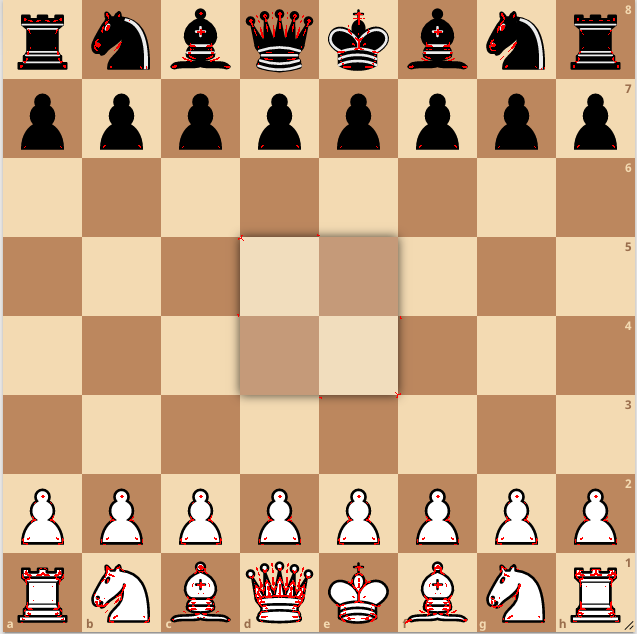

In [ ]:
img = cv2.imread('King_of_the_Hill_chess.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# img - Input image. It should be grayscale and float32 type.
# blockSize - It is the size of neighbourhood considered for corner detection
# ksize - Aperture parameter of the Sobel derivative used.
# k - Harris detector free parameter in the equation.
dst = cv2.cornerHarris(gray, 2, 23, 0.04)

# Treat low values as non-corners
img[dst > 0.01 * dst.max()] = [0, 0, 255]

cv2_imshow(img)

## SIFT

Documentation:
https://docs.opencv.org/4.x/d7/d60/classcv_1_1SIFT.html

Patented

In [ ]:
# Image with lots of corners
!wget https://upload.wikimedia.org/wikipedia/commons/c/c3/Fotograf%C3%ADa_nocturna_del_Alc%C3%A1zar_de_Segovia.jpg

--2023-02-06 13:47:24--  https://upload.wikimedia.org/wikipedia/commons/c/c3/Fotograf%C3%ADa_nocturna_del_Alc%C3%A1zar_de_Segovia.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 620365 (606K) [image/jpeg]
Saving to: ‘Fotografía_nocturna_del_Alcázar_de_Segovia.jpg’

Fotografía_nocturna 100%[===================>] 605.83K  2.40MB/s    in 0.2s    

2023-02-06 13:47:25 (2.40 MB/s) - ‘Fotografía_nocturna_del_Alcázar_de_Segovia.jpg’ saved [620365/620365]



Keypoint Class:

- pt - X, Y
- size - diameter of the feature
- angle - orientation of feature
- response - strength of the keypoints
- octave - indicates layer in image pyramid where feature was found
- class_id - custom identifier to a keypoint or a group of keypoints

In [ ]:
img = cv2.imread('Fotografía_nocturna_del_Alcázar_de_Segovia.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create SIFT Instance
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

cv2.drawKeypoints(img, keypoints, img, (0, 255, 0),
                  cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

## SURF

Patented

In [23]:
img = cv2.imread('Fotografía_nocturna_del_Alcázar_de_Segovia.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create SURF Instance with a threshold value
surf = cv2.xfeatures2d.SURF_create(8000)
keypoints, descriptors = surf.detectAndCompute(gray, None)

cv2.drawKeypoints(img, keypoints, img, (0, 255, 0),
                  cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(img)

error: ignored

## FAST (Featuers from Accelerated Segment Test (FAST))

In [ ]:
img = cv2.imread('Fotografía_nocturna_del_Alcázar_de_Segovia.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create FAST Instance with a threshold value
fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(gray, None)

cv2.drawKeypoints(img, keypoints, img, (0, 255, 0),
                  cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

## BRIEF (Binary Robust Independent Elementary Features)

In [27]:
img = cv2.imread('Fotografía_nocturna_del_Alcázar_de_Segovia.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(gray, None)

# compute the descriptors with BRIEF
keypoints, descriptors = brief.compute(gray, kp)

cv2.drawKeypoints(img, keypoints, img, (0, 255, 0),
                  cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

# Matching Logo with Two Images

## ORB (Oriented FAST and Rotated BRIEF)

Not Patented

In [2]:
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/images/nasa_logo.png
!wget https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/images/kennedy_space_center.jpg

--2023-02-06 16:23:47--  https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/images/nasa_logo.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26851 (26K) [image/png]
Saving to: ‘nasa_logo.png’

nasa_logo.png       100%[===================>]  26.22K  --.-KB/s    in 0.002s  

2023-02-06 16:23:47 (16.7 MB/s) - ‘nasa_logo.png’ saved [26851/26851]

--2023-02-06 16:23:47--  https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/images/kennedy_space_center.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserco

In [6]:
# Load the images
img0 = cv2.imread('nasa_logo.png', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('kennedy_space_center.jpg', cv2.IMREAD_GRAYSCALE)

# Perform ORB feature detection and description
orb = cv2.ORB_create()
kp0, des0 = orb.detectAndCompute(img0, None)
kp1, des1 = orb.detectAndCompute(img1, None)

# Perform brute-force matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des0, des1)

# Sort the matches by distance
matches = sorted(matches, key=lambda x:x.distance)

# Draw the best 25 matches
img_matches = cv2.drawMatches(
    img0, kp0, img1, kp1, matches[:25], img1,
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(img_matches)

Output hidden; open in https://colab.research.google.com to view.

## Filter Matches with KNN and Ratio Test

Ratio test is a heuristic method used to determine the quality of matches between two sets of features, such as keypoints, extracted from two images.

The idea behind the ratio test is to compare the distance between the closest and second closest neighbors of a feature in one image to a threshold, often referred to as the "ratio" or "distance ratio." If the distance between the closest neighbor and the second closest neighbor is smaller than this threshold, the feature match is considered to be reliable, otherwise, it is considered to be an outlier and is discarded.

This test helps to reduce the number of false matches while retaining true matches. By controlling the threshold or ratio value, the number of retained matches can be adjusted to balance the trade-off between false negatives and false positives.

In [8]:
# Load the images.
img0 = cv2.imread('nasa_logo.png', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('kennedy_space_center.jpg', cv2.IMREAD_GRAYSCALE)

# Perform ORB feature detection and description.
orb = cv2.ORB_create()
kp0, des0 = orb.detectAndCompute(img0, None)
kp1, des1 = orb.detectAndCompute(img1, None)

# Brute force KNN Matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
matches = bf.knnMatch(des0, des1, k=2)

# Sort by distance
matches = sorted(matches, key=lambda x : x[0].distance)

# Draw best paris of matches < 25
img_pairs_of_matches = cv2.drawMatchesKnn(
    img0, kp0, img1, kp1, matches[:25], img1,
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(img_pairs_of_matches)

Output hidden; open in https://colab.research.google.com to view.

In [11]:
# Applying the ratio test (threshold 0.8 * distance score of second best match)
matches = [x[0] for x in matches if len(x) > 1 and x[0].distance < 0.8 * x[1].distance]

# Draw the best 25 matches
img_matches = cv2.drawMatches(
    img0, kp0, img1, kp1, matches[:25], img1,
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(img_matches)

Output hidden; open in https://colab.research.google.com to view.

# Matching with FLANN (Fast Libary for Approximate Nearest Neighbors)

Open source libary under the mermissive 2-clause BSD license

In [13]:
!wget https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/images/gauguin_entre_les_lys.jpg
!wget https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/images/gauguin_paintings.png

--2023-02-06 17:36:25--  https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/images/gauguin_entre_les_lys.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93732 (92K) [image/jpeg]
Saving to: ‘gauguin_entre_les_lys.jpg’

gauguin_entre_les_l 100%[===================>]  91.54K  --.-KB/s    in 0.01s   

2023-02-06 17:36:25 (6.12 MB/s) - ‘gauguin_entre_les_lys.jpg’ saved [93732/93732]

--2023-02-06 17:36:25--  https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/images/gauguin_paintings.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githu

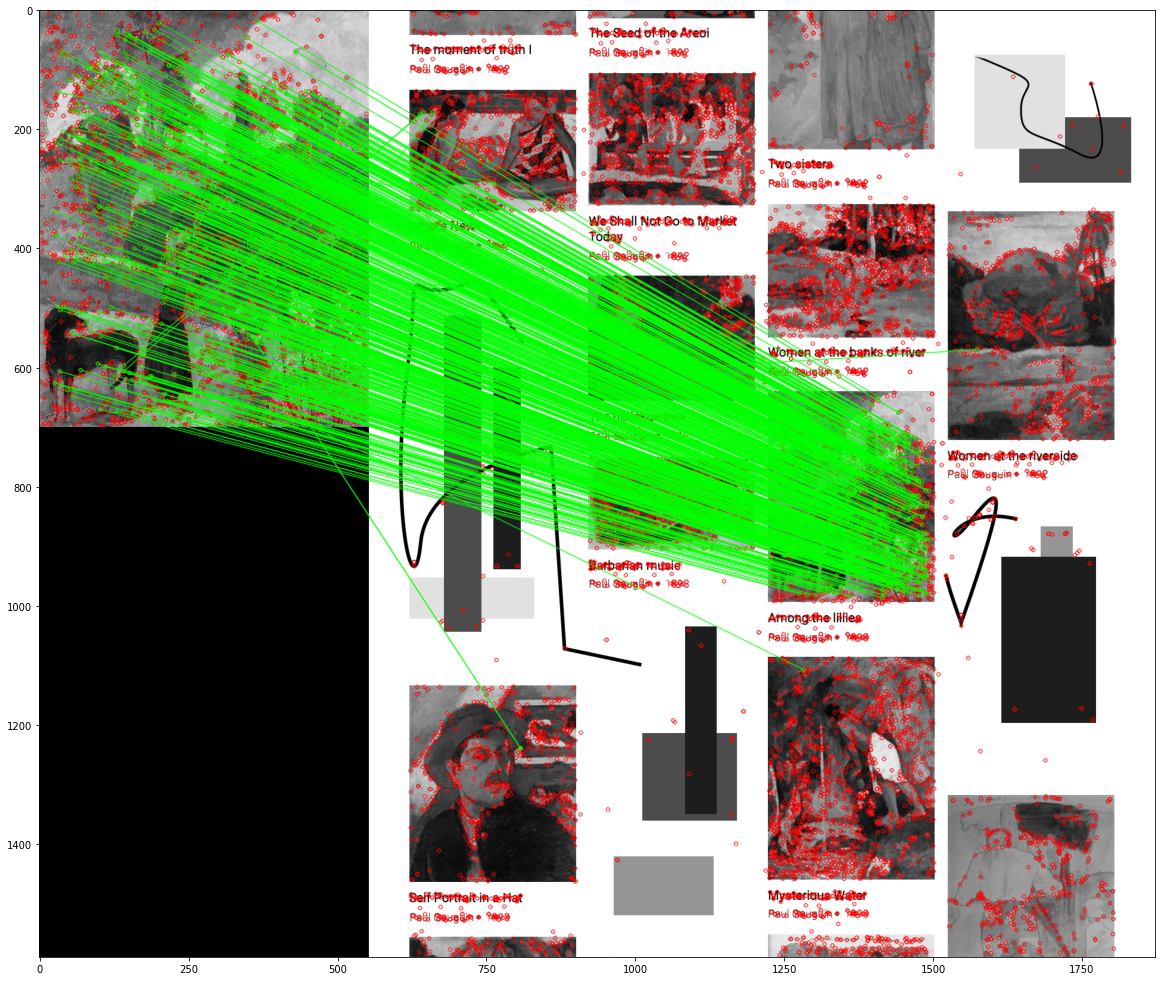

In [17]:
img = cv2.imread('gauguin_entre_les_lys.jpg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('gauguin_paintings.png', cv2.IMREAD_GRAYSCALE)

# Create SIFT feature detection and descriptors
sift = cv2.SIFT_create()
kp0, des0 = sift.detectAndCompute(img, None)
kp1, des1 = sift.detectAndCompute(img1, None)

# Define FLANN-based matching parameters.
FLANN_INDEX_KDTREE = 1

index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

# Define FLANN Based matching
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des0, des1, k=2)

# Prepare an empty mask to draw good matches
mask_matches = [[0, 0] for i in range(len(matches))]

# Populate the mask based on David G. Lowe's ratio test
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        mask_matches[i]=[1, 0]

# Draw the matches that passed the ratio test.
img_matches = cv2.drawMatchesKnn(
    img, kp0, img1, kp1, matches, None,
    matchColor=(0, 255, 0), singlePointColor=(255, 0, 0),
    matchesMask=mask_matches, flags=0)

plt.figure(figsize=(20, 20))
plt.imshow(img_matches)

## Homography

Projective transformation between two images of a scene taken from different viewpoints. It maps corresponding points in the two images to one another, allowing for the extraction of relative camera positions, planar structures, and scene context. In computer vision, homographies are used for tasks such as image stitching, panorama creation, and object detection.

In [18]:
!wget https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/images/tattoos/query.png
!wget https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/images/tattoos/anchor-man.png

--2023-02-06 18:14:56--  https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/images/tattoos/query.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15349 (15K) [image/png]
Saving to: ‘query.png’

query.png           100%[===================>]  14.99K  --.-KB/s    in 0.001s  

2023-02-06 18:14:57 (28.4 MB/s) - ‘query.png’ saved [15349/15349]

--2023-02-06 18:14:57--  https://raw.githubusercontent.com/PacktPublishing/Learning-OpenCV-4-Computer-Vision-with-Python-Third-Edition/master/images/tattoos/anchor-man.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.

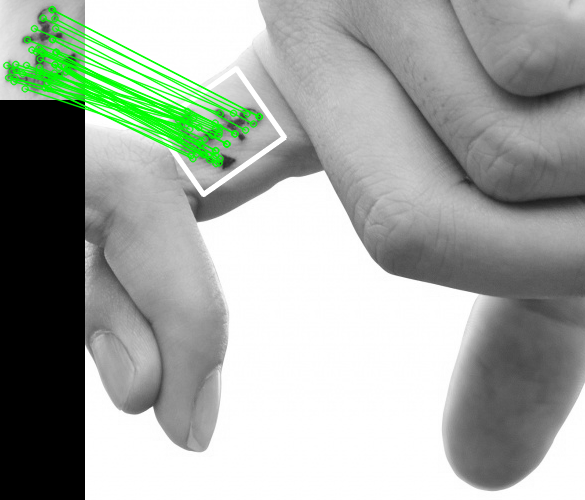

In [22]:
img0 = cv2.imread('query.png', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('anchor-man.png', cv2.IMREAD_GRAYSCALE)

# Perform SIFT feature detection and descriptors
sift = cv2.SIFT_create()
kp0, des0 = sift.detectAndCompute(img0, None)
kp1, des1 = sift.detectAndCompute(img1, None)

# Define FLANN-based matching parameters.
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

# Perform FLANN-based matching.
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des0, des1, k=2)

# Find all the good matches as per Lowe's ratio test.
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

MIN_NUM_GOOD_MATCHES = 10
if len(good_matches) >= MIN_NUM_GOOD_MATCHES:
    src_pts = np.float32(
        [kp0[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32(
        [kp1[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    mask_matches = mask.ravel().tolist()

    h, w = img0.shape
    src_corners = np.float32(
        [[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
    dst_corners = cv2.perspectiveTransform(src_corners, M)
    dst_corners = dst_corners.astype(np.int32)

    # Draw the bounds of the matched region based on the homography.
    num_corners = len(dst_corners)
    for i in range(num_corners):
        x0, y0 = dst_corners[i][0]
        if i == num_corners - 1:
            next_i = 0
        else:
            next_i = i + 1
        x1, y1 = dst_corners[next_i][0]
        cv2.line(img1, (x0, y0), (x1, y1), 255, 3, cv2.LINE_AA)
    
    # Draw the matches that passed the ratio test.
    img_matches = cv2.drawMatches(
        img0, kp0, img1, kp1, good_matches, None,
        matchColor=(0, 255, 0), singlePointColor=None,
        matchesMask=mask_matches, flags=2)

    cv2_imshow(img_matches)